## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("X_train.shape: {0}".format(x_train.shape))
print("y_train.shape: {0}".format(y_train.shape))

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)


In [4]:
# Flatten the images
#x_train = x_train.reshape((len(x_train), -1))
#x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
#     input_layer = keras.layers.Input([x_train.shape[-1]])
#     x = keras.layers.Dense(units=512, activation="relu")(input_layer)
#     x = keras.layers.Dense(units=256, activation="relu")(x)
#     x = keras.layers.Dense(units=128, activation="relu")(x)
#     out = keras.layers.Dense(units=10, activation="softmax")(x)
#     model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    model = Sequential()
    
    #卷積層1與池化層1
    model.add(Conv2D(filters=32,kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    #model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層3與池化層3
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    #model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation='softmax'))

    return model

In [6]:
"""
Compile your model
"""
model = build_mlp()

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [7]:
p_epoch = 500
p_batch_size = 32

model.fit(x_train, y_train, epochs=p_epoch, batch_size=p_batch_size, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 20s 402us/step - loss: 1.9647 - acc: 0.2906 - val_loss: 1.7474 - val_acc: 0.3842
Epoch 2/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.5909 - acc: 0.4311 - val_loss: 1.4849 - val_acc: 0.4641
Epoch 3/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.4162 - acc: 0.4922 - val_loss: 1.4651 - val_acc: 0.4886
Epoch 4/500
50000/50000 [==============================] - 17s 350us/step - loss: 1.3015 - acc: 0.5389 - val_loss: 1.2777 - val_acc: 0.5410
Epoch 5/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.2029 - acc: 0.5751 - val_loss: 1.2362 - val_acc: 0.5546
Epoch 6/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.1150 - acc: 0.6068 - val_loss: 1.1544 - val_acc: 0.5942
Epoch 7/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.0410 - acc: 0.6356 - val_l

50000/50000 [==============================] - 17s 350us/step - loss: 5.6876e-04 - acc: 1.0000 - val_loss: 1.9197 - val_acc: 0.7267
Epoch 59/500
50000/50000 [==============================] - 18s 351us/step - loss: 5.4662e-04 - acc: 1.0000 - val_loss: 1.9267 - val_acc: 0.7282
Epoch 60/500
50000/50000 [==============================] - 17s 349us/step - loss: 5.2983e-04 - acc: 1.0000 - val_loss: 1.9324 - val_acc: 0.7279
Epoch 61/500
50000/50000 [==============================] - 18s 354us/step - loss: 5.1112e-04 - acc: 1.0000 - val_loss: 1.9362 - val_acc: 0.7271
Epoch 62/500
50000/50000 [==============================] - 17s 349us/step - loss: 4.9390e-04 - acc: 1.0000 - val_loss: 1.9426 - val_acc: 0.7275
Epoch 63/500
50000/50000 [==============================] - 18s 351us/step - loss: 4.7804e-04 - acc: 1.0000 - val_loss: 1.9468 - val_acc: 0.7284
Epoch 64/500
50000/50000 [==============================] - 18s 350us/step - loss: 4.6352e-04 - acc: 1.0000 - val_loss: 1.9515 - val_acc: 0.726

50000/50000 [==============================] - 17s 349us/step - loss: 1.7508e-04 - acc: 1.0000 - val_loss: 2.0981 - val_acc: 0.7254
Epoch 115/500
50000/50000 [==============================] - 18s 353us/step - loss: 1.7277e-04 - acc: 1.0000 - val_loss: 2.1000 - val_acc: 0.7250
Epoch 116/500
50000/50000 [==============================] - 18s 350us/step - loss: 1.7065e-04 - acc: 1.0000 - val_loss: 2.1022 - val_acc: 0.7253
Epoch 117/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.6838e-04 - acc: 1.0000 - val_loss: 2.1039 - val_acc: 0.7254
Epoch 118/500
50000/50000 [==============================] - 18s 353us/step - loss: 1.6642e-04 - acc: 1.0000 - val_loss: 2.1058 - val_acc: 0.7251
Epoch 119/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.6424e-04 - acc: 1.0000 - val_loss: 2.1077 - val_acc: 0.7255
Epoch 120/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.6229e-04 - acc: 1.0000 - val_loss: 2.1091 - val_acc:

50000/50000 [==============================] - 18s 351us/step - loss: 9.8835e-05 - acc: 1.0000 - val_loss: 2.1792 - val_acc: 0.7248
Epoch 171/500
50000/50000 [==============================] - 18s 351us/step - loss: 9.8170e-05 - acc: 1.0000 - val_loss: 2.1800 - val_acc: 0.7247
Epoch 172/500
50000/50000 [==============================] - 18s 352us/step - loss: 9.7393e-05 - acc: 1.0000 - val_loss: 2.1812 - val_acc: 0.7248
Epoch 173/500
50000/50000 [==============================] - 17s 349us/step - loss: 9.6623e-05 - acc: 1.0000 - val_loss: 2.1824 - val_acc: 0.7249
Epoch 174/500
50000/50000 [==============================] - 17s 349us/step - loss: 9.5851e-05 - acc: 1.0000 - val_loss: 2.1834 - val_acc: 0.7246
Epoch 175/500
50000/50000 [==============================] - 18s 351us/step - loss: 9.5097e-05 - acc: 1.0000 - val_loss: 2.1842 - val_acc: 0.7248
Epoch 176/500
50000/50000 [==============================] - 17s 350us/step - loss: 9.4314e-05 - acc: 1.0000 - val_loss: 2.1855 - val_acc:

50000/50000 [==============================] - 18s 353us/step - loss: 6.7521e-05 - acc: 1.0000 - val_loss: 2.2308 - val_acc: 0.7250
Epoch 227/500
50000/50000 [==============================] - 18s 352us/step - loss: 6.7127e-05 - acc: 1.0000 - val_loss: 2.2316 - val_acc: 0.7248
Epoch 228/500
50000/50000 [==============================] - 18s 350us/step - loss: 6.6758e-05 - acc: 1.0000 - val_loss: 2.2325 - val_acc: 0.7247
Epoch 229/500
50000/50000 [==============================] - 17s 348us/step - loss: 6.6397e-05 - acc: 1.0000 - val_loss: 2.2333 - val_acc: 0.7247
Epoch 230/500
50000/50000 [==============================] - 17s 349us/step - loss: 6.5981e-05 - acc: 1.0000 - val_loss: 2.2339 - val_acc: 0.7248
Epoch 231/500
50000/50000 [==============================] - 17s 348us/step - loss: 6.5619e-05 - acc: 1.0000 - val_loss: 2.2347 - val_acc: 0.7244
Epoch 232/500
50000/50000 [==============================] - 17s 348us/step - loss: 6.5240e-05 - acc: 1.0000 - val_loss: 2.2355 - val_acc:

50000/50000 [==============================] - 18s 350us/step - loss: 5.0643e-05 - acc: 1.0000 - val_loss: 2.2690 - val_acc: 0.7244
Epoch 283/500
50000/50000 [==============================] - 17s 349us/step - loss: 5.0436e-05 - acc: 1.0000 - val_loss: 2.2694 - val_acc: 0.7245
Epoch 284/500
50000/50000 [==============================] - 18s 351us/step - loss: 5.0201e-05 - acc: 1.0000 - val_loss: 2.2703 - val_acc: 0.7247
Epoch 285/500
50000/50000 [==============================] - 17s 349us/step - loss: 5.0008e-05 - acc: 1.0000 - val_loss: 2.2707 - val_acc: 0.7248
Epoch 286/500
50000/50000 [==============================] - 17s 349us/step - loss: 4.9746e-05 - acc: 1.0000 - val_loss: 2.2715 - val_acc: 0.7247
Epoch 287/500
50000/50000 [==============================] - 17s 349us/step - loss: 4.9552e-05 - acc: 1.0000 - val_loss: 2.2720 - val_acc: 0.7247
Epoch 288/500
50000/50000 [==============================] - 17s 349us/step - loss: 4.9302e-05 - acc: 1.0000 - val_loss: 2.2725 - val_acc:

50000/50000 [==============================] - 17s 348us/step - loss: 4.0233e-05 - acc: 1.0000 - val_loss: 2.2991 - val_acc: 0.7243
Epoch 339/500
50000/50000 [==============================] - 17s 349us/step - loss: 4.0078e-05 - acc: 1.0000 - val_loss: 2.2992 - val_acc: 0.7240
Epoch 340/500
50000/50000 [==============================] - 17s 348us/step - loss: 3.9939e-05 - acc: 1.0000 - val_loss: 2.2999 - val_acc: 0.7243
Epoch 341/500
50000/50000 [==============================] - 17s 350us/step - loss: 3.9804e-05 - acc: 1.0000 - val_loss: 2.3005 - val_acc: 0.7244
Epoch 342/500
50000/50000 [==============================] - 17s 349us/step - loss: 3.9622e-05 - acc: 1.0000 - val_loss: 2.3011 - val_acc: 0.7244
Epoch 343/500
50000/50000 [==============================] - 17s 349us/step - loss: 3.9522e-05 - acc: 1.0000 - val_loss: 2.3013 - val_acc: 0.7243
Epoch 344/500
50000/50000 [==============================] - 17s 349us/step - loss: 3.9362e-05 - acc: 1.0000 - val_loss: 2.3018 - val_acc:

50000/50000 [==============================] - 18s 351us/step - loss: 3.3180e-05 - acc: 1.0000 - val_loss: 2.3234 - val_acc: 0.7241
Epoch 395/500
50000/50000 [==============================] - 17s 349us/step - loss: 3.3097e-05 - acc: 1.0000 - val_loss: 2.3239 - val_acc: 0.7237
Epoch 396/500
50000/50000 [==============================] - 18s 351us/step - loss: 3.2988e-05 - acc: 1.0000 - val_loss: 2.3242 - val_acc: 0.7240
Epoch 397/500
50000/50000 [==============================] - 18s 350us/step - loss: 3.2895e-05 - acc: 1.0000 - val_loss: 2.3247 - val_acc: 0.7242
Epoch 398/500
50000/50000 [==============================] - 17s 346us/step - loss: 3.2785e-05 - acc: 1.0000 - val_loss: 2.3250 - val_acc: 0.7235
Epoch 399/500
50000/50000 [==============================] - 17s 349us/step - loss: 3.2687e-05 - acc: 1.0000 - val_loss: 2.3255 - val_acc: 0.7241
Epoch 400/500
50000/50000 [==============================] - 17s 349us/step - loss: 3.2588e-05 - acc: 1.0000 - val_loss: 2.3259 - val_acc:

50000/50000 [==============================] - 17s 349us/step - loss: 2.8142e-05 - acc: 1.0000 - val_loss: 2.3443 - val_acc: 0.7234
Epoch 451/500
50000/50000 [==============================] - 17s 349us/step - loss: 2.8061e-05 - acc: 1.0000 - val_loss: 2.3446 - val_acc: 0.7236
Epoch 452/500
50000/50000 [==============================] - 18s 350us/step - loss: 2.7996e-05 - acc: 1.0000 - val_loss: 2.3449 - val_acc: 0.7237
Epoch 453/500
50000/50000 [==============================] - 18s 350us/step - loss: 2.7922e-05 - acc: 1.0000 - val_loss: 2.3453 - val_acc: 0.7238
Epoch 454/500
50000/50000 [==============================] - 17s 348us/step - loss: 2.7842e-05 - acc: 1.0000 - val_loss: 2.3456 - val_acc: 0.7238
Epoch 455/500
50000/50000 [==============================] - 18s 350us/step - loss: 2.7761e-05 - acc: 1.0000 - val_loss: 2.3460 - val_acc: 0.7237
Epoch 456/500
50000/50000 [==============================] - 18s 350us/step - loss: 2.7691e-05 - acc: 1.0000 - val_loss: 2.3462 - val_acc:

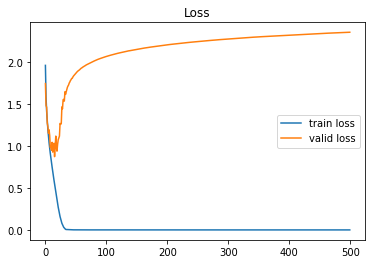

In [8]:
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

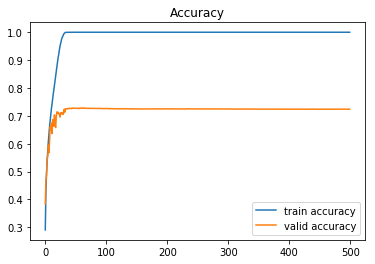

In [9]:
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()